## Download data

In [ ]:
# !wget -O ../data/geotiff.zip 'https://dl.dropbox.com/scl/fo/yhjzz9lz1zynw2abcy5k6/h/geotiff.zip?dl=1&rlkey=wz5gosnhfz83tkmmg540puiqa'

In [3]:
import os
from glob import glob
import rasterio
from PIL import Image
import numpy as np
from rasterio.features import geometry_mask
from rasterio.transform import Affine
from shapely.geometry import box
from fiona.crs import from_epsg
import geopandas as gpd
from pyproj import CRS, Transformer
import matplotlib.pyplot as plt


In [4]:
def read_prj_file(prj_file_path):
    with open(prj_file_path, 'r') as prj_file:
        prj_contents = prj_file.read()
    return prj_contents

def search_files(file_path, pattern="*"):
    return glob(os.path.join(file_path, pattern))

def read_tfw(filename):
    with open(filename, 'r') as f:
        return [float(line.strip()) for line in f]

## Read TIFF image and its metadata from TFW file

In [9]:
geotiff_root_path = "../data/geotiff/geotiff"

tiff_imgs = search_files(geotiff_root_path, "*.tif")
tfw_data = [ read_tfw(image_path.replace(".tif", ".tfw")) for image_path in tiff_imgs]

In [12]:
tiff_imgs[0], tfw_data[0]

('../data/geotiff/geotiff\\JS_0124_P1_B1_0002.tif',
 [0.05, 0.0, 0.0, -0.05, 317064.318, 408800.525])

## Inspect TIFF image

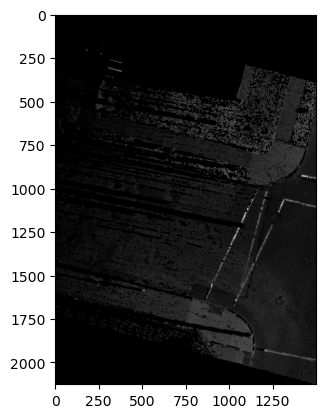

In [23]:
plt.imshow(np.array(Image.open(tiff_imgs[0])))

In [15]:
sample_dataset = rasterio.open(tiff_imgs[0])

### The transformation information is the same as the one in the TFW file

In [16]:
sample_dataset.transform

Affine(0.05, 0.0, 317064.293,
       0.0, -0.05, 408800.55)

### Inspect the CRS

In [17]:
sample_dataset.crs

CRS.from_wkt('LOCAL_CS["unnamed",UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

### Convert the CRS to EPSG:4326

In [21]:
# Define the source and target CRS
crs_4326 = 'EPSG:4326'
crs_9001 = 'EPSG:9001'
crs_utm_nj = CRS.from_string('EPSG:26918')

# Create a transformer for the conversion from target to source CRS
transformer_9001_to_4326 = Transformer.from_crs(crs_9001, crs_4326, always_xy=True)

# Create a transformer for the conversion from target to source CRS
transformer_utm_to_4326 = Transformer.from_crs(crs_utm_nj, crs_4326, always_xy=True)

# Example conversion from EPSG:9001 to EPSG:4326
x, y =  (317064.293, 408800.55) # This is the coordinate of the upper left corner of the image
lon, lat = transformer_9001_to_4326.transform(x, y)
print(f'Converted from EPSG:9001 to EPSG:4326: ({lon}, {lat})')





Converted from EPSG:9001 to EPSG:4326: (52.20296811092418, 0.0)


In [22]:
# Example conversion from UTM to EPSG:4326
x, y = (317064.293, 408800.55)  # Example UTM coordinates in New Jersey
lon, lat = transformer_utm_to_4326.transform(x, y)
print(f'Converted from UTM to EPSG:4326: ({lon}, {lat})')

Converted from UTM to EPSG:4326: (-76.6471757447023, 3.69696101319678)
